<a href="https://colab.research.google.com/github/anitasharma2005/Fibonacci-Sequence/blob/main/image_classification_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10


In [10]:
# load cifar 10 dataset
(x_train, y_train), (x_test, y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [11]:
#normalize pixel values between 0 and 1
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0

In [16]:
#define model
model=keras.Sequential([
    keras.Input(shape=(32,32,3)),
    layers.Conv2D(32,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(10,activation="softmax")
])

In [17]:
#compile the model
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])


In [18]:
#train the model
history=model.fit(x_train,y_train,batch_size=128,epochs=10,validation_split=0.1)

Epoch 1/10
352/352 [==============================] - 52s 144ms/step - loss: 1.7319 - accuracy: 0.3759 - val_loss: 1.4455 - val_accuracy: 0.4898
Epoch 2/10
352/352 [==============================] - 52s 148ms/step - loss: 1.4131 - accuracy: 0.4990 - val_loss: 1.2885 - val_accuracy: 0.5502
Epoch 3/10
352/352 [==============================] - 52s 148ms/step - loss: 1.3105 - accuracy: 0.5364 - val_loss: 1.2032 - val_accuracy: 0.5890
Epoch 4/10
352/352 [==============================] - 51s 144ms/step - loss: 1.2358 - accuracy: 0.5689 - val_loss: 1.1278 - val_accuracy: 0.6144
Epoch 5/10
352/352 [==============================] - 52s 147ms/step - loss: 1.1798 - accuracy: 0.5898 - val_loss: 1.0942 - val_accuracy: 0.6286
Epoch 6/10
352/352 [==============================] - 50s 143ms/step - loss: 1.1376 - accuracy: 0.6049 - val_loss: 1.0483 - val_accuracy: 0.6420
Epoch 7/10
352/352 [==============================] - 52s 147ms/step - loss: 1.0914 - accuracy: 0.6214 - val_loss: 1.0054 - val_ac

In [19]:
#evaluate a model
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=2)
print("/nTest accuracy:",test_acc)


313/313 - 4s - loss: 0.9521 - accuracy: 0.6740 - 4s/epoch - 13ms/step
/nTest accuracy: 0.6740000247955322


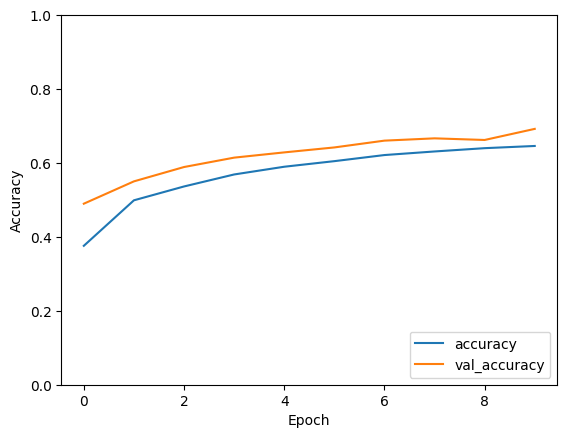

In [20]:
#plot the training history
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.show()
